# **DA Final project** 
***
### **Name of students:**
### Amit Gido
### Niv Levi
### Sahar Sokolik
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
url = 'https://raw.githubusercontent.com/amitgido/Data_analysis_final_project/main/supermarket%20sales.csv'
supermarket_df = pd.read_csv(url)

In [2]:
supermarket_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


---
> ### 1. Data Munging

In [3]:
supermarket_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#### 1.1 Change the date column to a date type :
- Add a Weekday column.
    - Invert the Date column to a datetime64 type.
    - Add a new column of the weekday by the special `.dt.strftime('%A')` method.
<p>
- Seprate the date column to different columns with `.Datetime()` method.
<p>
- Delete the origianl Date column by `.drop()`.

In [4]:
supermarket_df['Date'] = pd.DatetimeIndex(supermarket_df.Date)
supermarket_df['Weekday'] = supermarket_df['Date'].dt.strftime('%A')
supermarket_df['Day'] = pd.DatetimeIndex(supermarket_df.Date).day
supermarket_df['Month'] = pd.DatetimeIndex(supermarket_df.Date).month
supermarket_df['Year'] = pd.DatetimeIndex(supermarket_df.Date).year
supermarket_df = supermarket_df.drop('Date', 1) #Date column is no longer necessaryאם תריצו פעמיים זה יקרוס כי הוא ינסה למחוק עמודה שלא קיימת

In [5]:
supermarket_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Weekday                     object
Day                          int64
Month                        int64
Year                         int64
dtype: object

In [6]:
#supermarket_df['Time'] = supermarket_df['Time'].astype('str')
#supermarket_df['Time'] = supermarket_df['Time'].str.replace(':', '').astype('int64')
#supermarket_df.loc[:,['Time']]

#### 1.3 Change customer type to Member boolean
- Rename the Customer type column to a Member column by `.rename()`.
<p>
- Replace the values to boolean by `.replace()`.

In [7]:
supermarket_df.rename({'Customer type': 'Member'}, axis=1, inplace=True)
supermarket_df = supermarket_df.replace({'Member': {'Member': True, 'Normal': False}})
supermarket_df.head()

,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Day,Month,Year
0,750-67-8428,A,Yangon,True,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,5,1,2019
1,226-31-3081,C,Naypyitaw,False,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,8,3,2019
2,631-41-3108,A,Yangon,False,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,3,2019
3,123-19-1176,A,Yangon,True,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,27,1,2019
4,373-73-7910,A,Yangon,False,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,8,2,2019


#### 1.4 Assign number to each branch
- Replace the letters to numeric values.

In [8]:
supermarket_df = supermarket_df.replace({'Branch': {'A': 1, 'B': 2, 'C': 3}})
supermarket_df.head()

,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Day,Month,Year
0,750-67-8428,1,Yangon,True,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,5,1,2019
1,226-31-3081,3,Naypyitaw,False,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,8,3,2019
2,631-41-3108,1,Yangon,False,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,3,2019
3,123-19-1176,1,Yangon,True,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,27,1,2019
4,373-73-7910,1,Yangon,False,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,8,2,2019


### 1.5 Noisy data
##### Boxplot all numberic data to check for discrepancy

In [9]:
df_to_plot = supermarket_df.drop(columns=['gross margin percentage','Time','Day','Month','Year'])
df_to_plot = df_to_plot.select_dtypes(include=np.number)

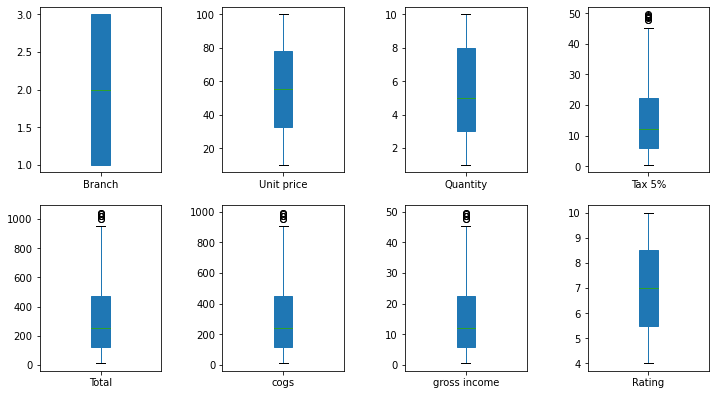

In [10]:
#subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [11]:
supermarket_df['Total'].max()
#having checked maximum value for total and due to the fact that tax,income and cogs are based on that, we can saftley say all values are in order.

1042.65

---
> ### 2. Correlations

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

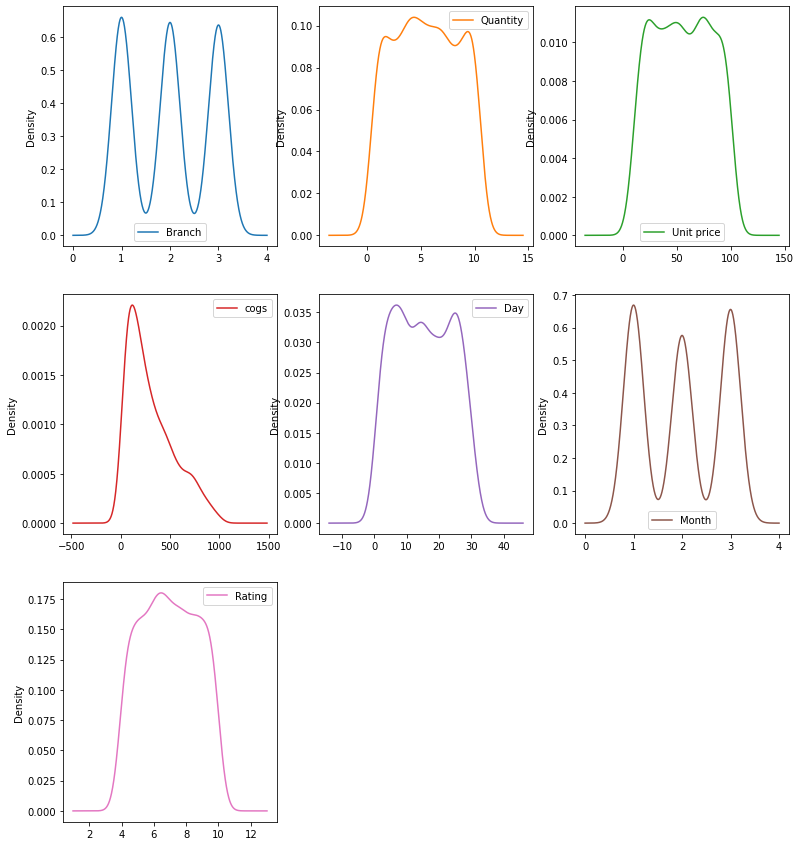

In [12]:
features = ['Branch','Quantity','Unit price','Time','cogs','Day','Month','Rating']
supermarket_df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(3, 3), figsize=(13,15))

<AxesSubplot:>

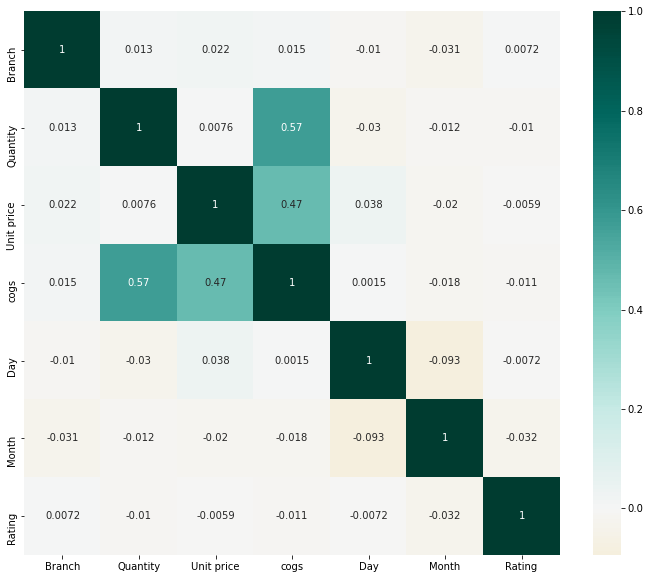

In [13]:
corrs = supermarket_df[features].corr(method = 'kendall')

plt.figure(figsize=(12,10))  #figure size
sns.heatmap(corrs, cmap='BrBG', center=0, annot = True )


---
> ### 3. Consumer culture in Myanmar

---

>##### Observation 1:
>
>there are barley any noticeable shopping habits,but if we observe some holidays induce small peaks or lows.
> we might wanna book more workers in these holidays and make sales that fit the holidays(flags for independence days,coal,etc.) where we witness lows to increase sales.
---

In [14]:
january_df = supermarket_df.loc[supermarket_df["Month"] == 1].groupby('Day')[['Total']].sum()
february_df = supermarket_df.loc[supermarket_df["Month"] == 2].groupby('Day')[['Total']].sum()
march_df = supermarket_df.loc[supermarket_df["Month"] == 3].groupby('Day')[['Total']].sum()

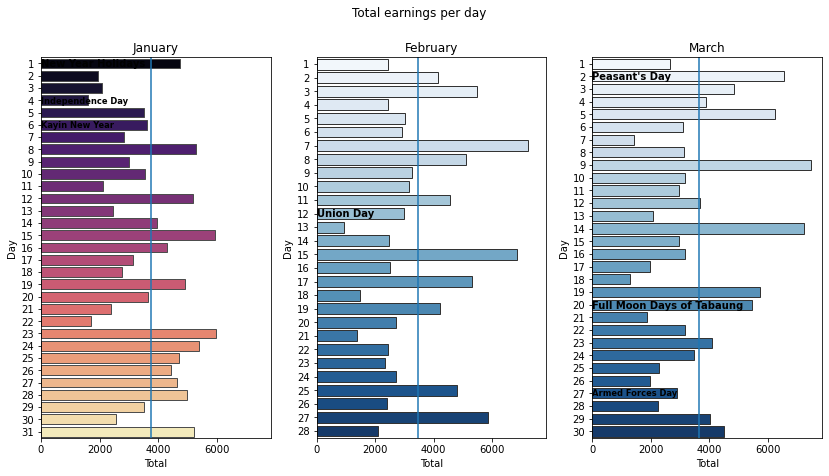

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(14, 7), sharey=False, sharex=True)

fig.suptitle('Total earnings per day')


sns.barplot(ax=axes[0], x=january_df["Total"], y=january_df.index,orient = "h", edgecolor=".3", palette="magma")
axes[0].set_title("January")
axes[0].text(0, 0.3, "New Year Holidays", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[0].text(0, 3.3, "Independence Day", horizontalalignment='left', size='small', color='black', weight='semibold')
axes[0].text(0, 5.2, "Kayin New Year", horizontalalignment='left', size='small', color='black', weight='semibold')
mean = january_df["Total"].mean()
axes[0].axvline(mean)

sns.barplot(ax=axes[1], x=february_df["Total"], y=february_df.index,orient = "h", edgecolor=".2",errcolor=".2", palette="Blues")
axes[1].set_title("February")
axes[1].text(0, 11.2, "Union Day", horizontalalignment='left', size='medium', color='black', weight='semibold')
mean = february_df["Total"].mean()
axes[1].axvline(mean)

sns.barplot(ax=axes[2], x=march_df["Total"], y=march_df.index,orient = "h", edgecolor=".2",errcolor=".2", palette="Blues")
axes[2].set_title("March")
axes[2].text(0, 1.3, "Peasant's Day", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[2].text(0, 19.3, "Full Moon Days of Tabaung", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[2].text(0, 26.15, "Armed Forces Day", horizontalalignment='left', size='small', color='black', weight='semibold')
mean = march_df["Total"].mean()
axes[2].axvline(mean)

In [16]:
week_df = supermarket_df.groupby(['Weekday'])[['Invoice ID']].count()
labels = ['Sunday','Monday','Thursday','Wednesday','Thursday','Friday','Saturday']
week_df.reindex(labels)

,Invoice ID
Weekday,
Sunday,133
Monday,125
Thursday,138
Wednesday,143
Thursday,138
Friday,139
Saturday,164


array([<AxesSubplot:ylabel='Invoice ID'>], dtype=object)

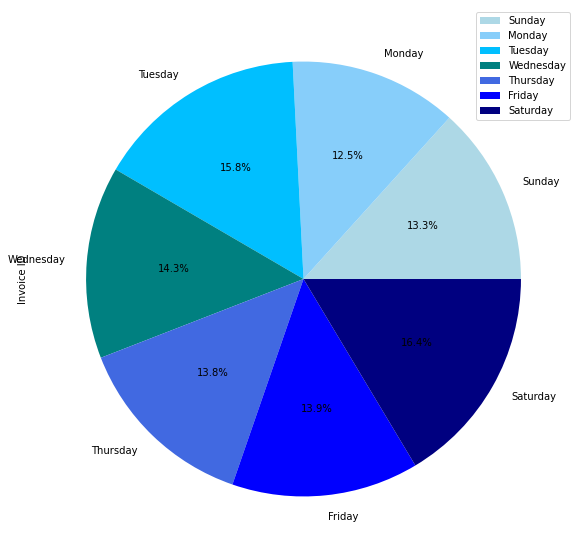

In [17]:
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
colors = ['lightblue','lightskyblue','deepskyblue','teal','royalblue','blue','navy']
weekday_df=supermarket_df.groupby(['Weekday'])[['Invoice ID']].count()
weekday_df.reindex(labels).plot(kind='pie', subplots=True,colors = colors, autopct='%1.1f%%',figsize=(15,10))

>##### Observation 2:
> sales seem to be rising chronologically from the start of the weeek(monday) spiking at saturday reaching its lowest point on monday. 
> stocking up towards Thursday would relieve pressuer from the weekend.
> we also suggests limiting staff on weaker days like monday


---
> ### 3. Customers Understanding

In [18]:
supermarket_df['Time'] = pd.to_datetime(supermarket_df['Time'])
supermarket_df['Hour'] = (supermarket_df['Time']).dt.hour
supermarket_df['Hour'].unique()
supermarket_df.groupby(['Hour']).agg({'Quantity': 'sum', 'Rating' :'mean'})

,Quantity,Rating
Hour,,
10,525,7.098020
11,513,6.806667
12,501,7.300000
13,585,7.030097
14,495,6.934940
15,530,6.876471
16,420,6.859740
17,415,6.939189
18,475,7.187097


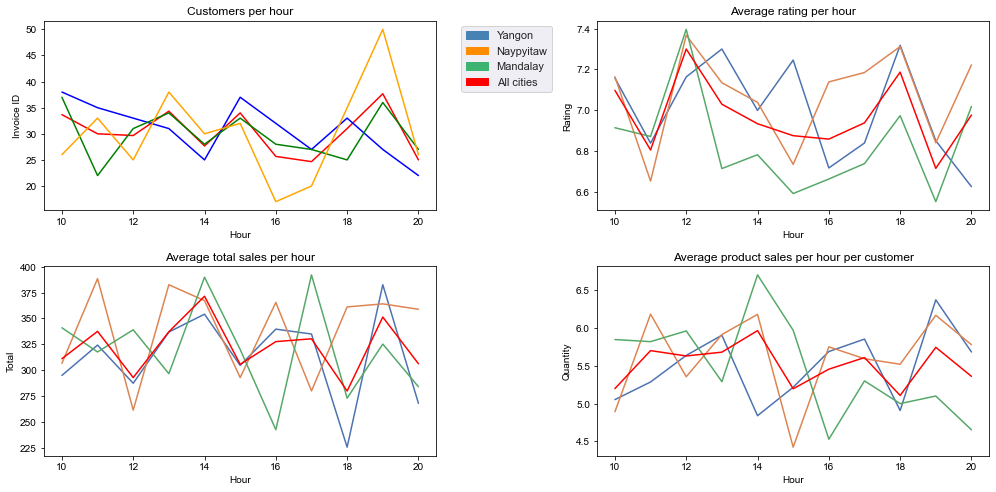

In [19]:
Yangon_DF = supermarket_df[supermarket_df['City'].str.contains('Yangon')]
Naypyitaw_DF = supermarket_df[supermarket_df['City'].str.contains('Naypyitaw')]
Mandalay_DF = supermarket_df[supermarket_df['City'].str.contains('Mandalay')]

fig, axes = plt.subplots(2, 2, figsize=(14, 7))
sns.set()
custumercount = supermarket_df.groupby(['Hour'])[['Invoice ID']].count().div(3)
custumercount_yagon = Yangon_DF.groupby(['Hour'])[['Invoice ID']].count()
custumercount_Naypyitaw = Naypyitaw_DF.groupby(['Hour'])[['Invoice ID']].count()
custumercount_Mandalay = Mandalay_DF.groupby(['Hour'])[['Invoice ID']].count()

sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount, color='red').set_title("Customers per hour")
sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount_yagon, color='blue')
sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount_Naypyitaw, color='green')
sns.lineplot(ax=axes[0,0],x="Hour",  y = 'Invoice ID',data =custumercount_Mandalay, color='orange')


sns.lineplot(ax=axes[0,1],x="Hour",hue = 'City',  y = 'Rating' ,data =supermarket_df, err_style=None).set_title("Average rating per hour")
sns.lineplot(ax=axes[0,1],x="Hour",  y = 'Rating',data =supermarket_df, color='red', err_style=None)

sns.lineplot(ax=axes[1,0],x="Hour",hue = 'City', y = 'Total',data =supermarket_df, err_style=None).set_title("Average total sales per hour")
sns.lineplot(ax=axes[1,0],x="Hour",  y = 'Total',data =supermarket_df, color='red', err_style=None)


sns.lineplot(ax=axes[1,1],x="Hour",hue = 'City',  y = 'Quantity',data =supermarket_df, err_style=None).set_title("Average product sales per hour per customer")
sns.lineplot(ax=axes[1,1],x="Hour",  y = 'Quantity',data =supermarket_df, color='red', err_style=None)

bar1 = mpatches.Patch(color='steelblue', label='Yangon')
bar2 = mpatches.Patch(color='darkorange', label='Naypyitaw')
bar3 = mpatches.Patch(color='mediumseagreen',label='Mandalay')
bar4= mpatches.Patch(color='red', label='All cities')

axes[0,0].legend(handles=[bar1,bar2,bar3,bar4],bbox_to_anchor= (1.05,1))

axes[0,1].legend([],[], frameon=False)
axes[1,0].legend([],[], frameon=False)
axes[1,1].legend([],[], frameon=False)

plt.tight_layout()

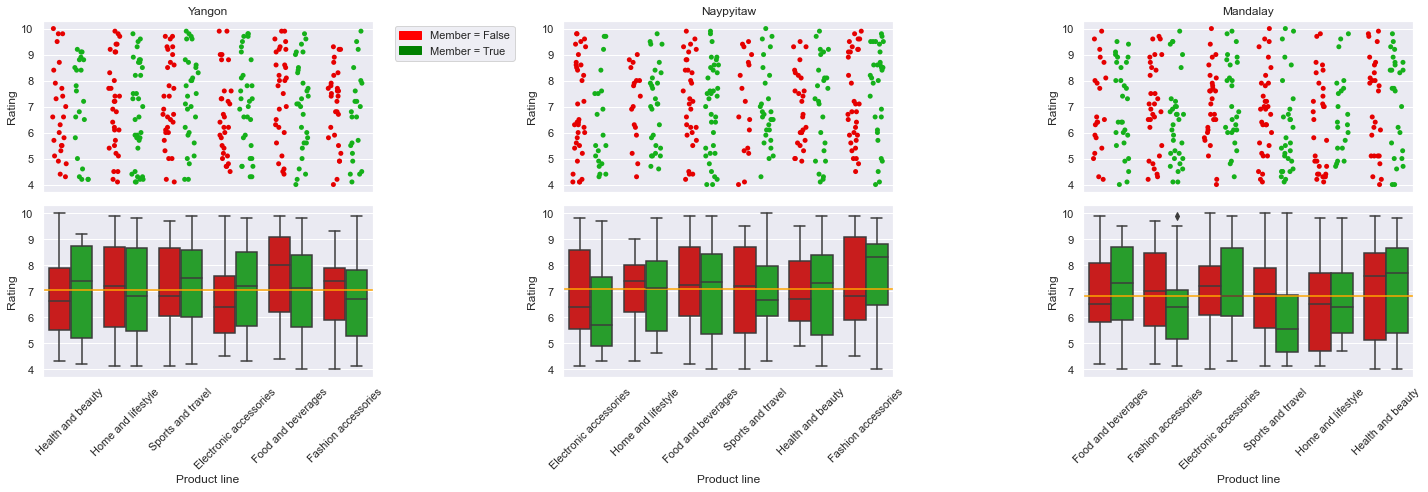

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 7))

colors = ['red','green']
sns.stripplot(ax=axes[0,0],data=Yangon_DF, x='Product line', y='Rating', hue='Member', jitter=0.25,dodge=True, palette=sns.xkcd_palette(colors)).set_title("Yangon")
sns.stripplot(ax=axes[0,1],data=Naypyitaw_DF, x='Product line', y='Rating', hue='Member', jitter=0.25,dodge=True, palette=sns.xkcd_palette(colors)).set_title("Naypyitaw")
sns.stripplot(ax=axes[0,2],data=Mandalay_DF, x='Product line', y='Rating', hue='Member', jitter=0.25,dodge=True, palette=sns.xkcd_palette(colors)).set_title("Mandalay")
axes[0,0].axes.get_xaxis().set_visible(False)
axes[0,1].axes.get_xaxis().set_visible(False)
axes[0,2].axes.get_xaxis().set_visible(False)
sns.boxplot(ax=axes[1,0],data=Yangon_DF ,x='Product line', y='Rating', hue='Member', palette=sns.xkcd_palette(colors)).tick_params(axis='x', rotation=45)
sns.boxplot(ax=axes[1,1],data=Naypyitaw_DF, x='Product line', y='Rating', hue='Member', palette=sns.xkcd_palette(colors)).tick_params(axis='x', rotation=45)
sns.boxplot(ax=axes[1,2],data=Mandalay_DF, x='Product line', y='Rating', hue='Member', palette=sns.xkcd_palette(colors)).tick_params(axis='x', rotation=45)

meanRY = Yangon_DF["Rating"].mean()
meanRN = Naypyitaw_DF["Rating"].mean()
meanRM = Mandalay_DF["Rating"].mean()

axes[1,0].axhline(meanRY,color="orange")
axes[1,1].axhline(meanRN,color="orange")
axes[1,2].axhline(meanRM,color="orange")



top_bar = mpatches.Patch(color=colors[0], label='Member = False')
bottom_bar = mpatches.Patch(color=colors[1], label='Member = True')
axes[0,0].legend(handles=[top_bar, bottom_bar],bbox_to_anchor= (1.05,1))

axes[0,1].legend([],[], frameon=False)
axes[0,2].legend([],[], frameon=False)
axes[1,0].legend([],[], frameon=False)
axes[1,1].legend([],[], frameon=False)
axes[1,2].legend([],[], frameon=False)
plt.tight_layout()
plt.show()


In [21]:
supermarket_df.pivot_table('Quantity',index='Product line', columns=['Gender','Member'],margins=True , aggfunc='sum')  
#aaa = supermarket_df.groupby(['Product line','Gender','Member'])[['Quantity']].sum()
#aaa.T.plot(kind='bar', stacked=True, figsize=(10, 20) )


Gender                 Female        Male         All
Member                  False  True False  True      
Product line                                         
Electronic accessories    280   208   262   221   971
Fashion accessories       273   257   190   182   902
Food and beverages        228   286   218   220   952
Health and beauty         185   158   241   270   854
Home and lifestyle        207   291   214   199   911
Sports and travel         204   292   223   201   920
All                      1377  1492  1348  1293  5510

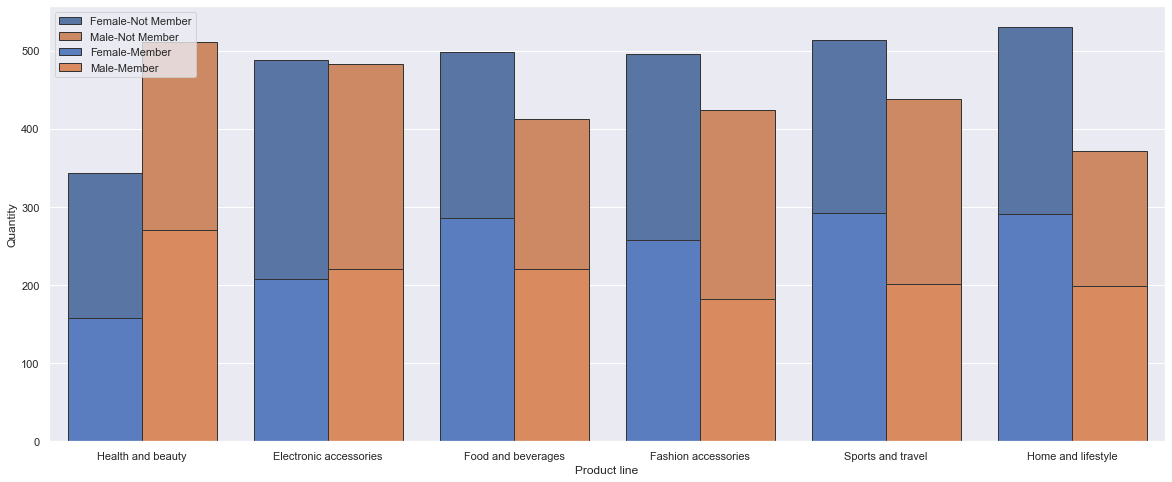

In [22]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Product line",  y="Quantity",hue='Gender', data=supermarket_df, edgecolor=".2", estimator=sum, ci=None)
Members = supermarket_df[supermarket_df.Member==True] #bottom bar ->  take only Member =True values from the data

# bar2 - bottom bars (group of 'Member=True')
sns.barplot(x="Product line", y="Quantity",hue='Gender', data=Members, palette="muted", estimator=sum, ci=None, edgecolor=".2",errcolor=".2").legend([],[], frameon=False)

plt.legend(loc='upper left', labels=['Female-Not Member',"Male-Not Member",'Female-Member',"Male-Member"])

plt.show()

#### ממוצע קנייה ללקוח חבר מעעדון או לא, לפי מחלקות 

array([<AxesSubplot:ylabel='Total'>], dtype=object)

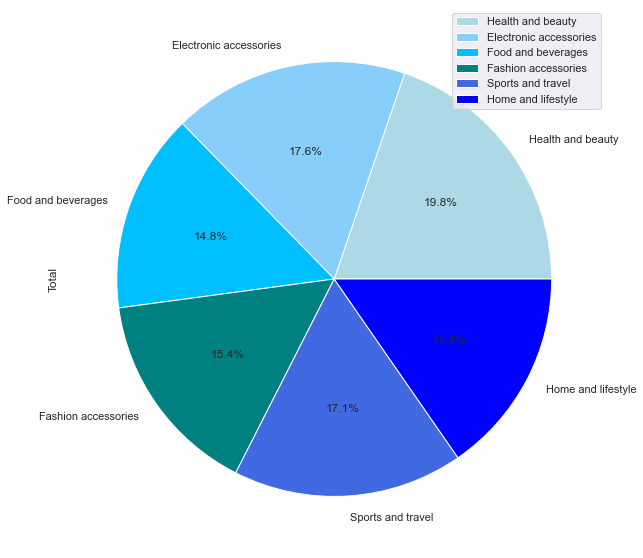

In [23]:
male_df = supermarket_df[supermarket_df['Gender'].str.contains('Male')]
labels = ['Health and beauty','Electronic accessories','Food and beverages','Fashion accessories','Sports and travel','Home and lifestyle']
colors = ['lightblue','lightskyblue','deepskyblue','teal','royalblue','blue','navy']
male_df_total_buy = male_df.groupby(['Product line'])[['Total']].sum()
male_df_total_buy.reindex(labels).plot(kind='pie', subplots=True,colors = colors, autopct='%1.1f%%',figsize=(15,10))

array([<AxesSubplot:ylabel='Total'>], dtype=object)

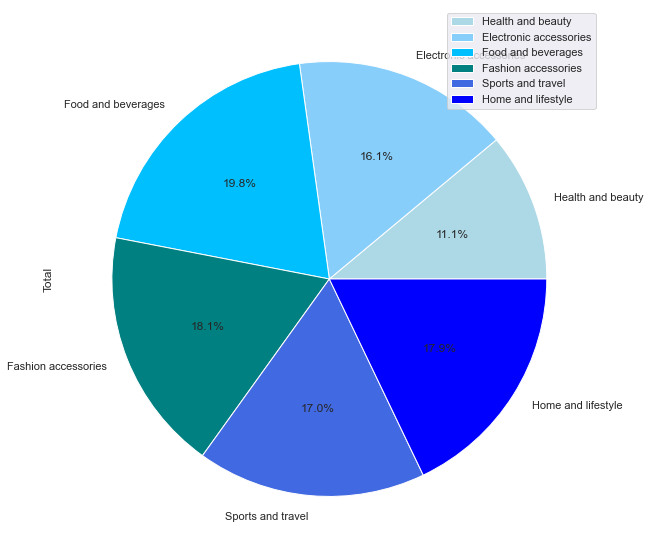

In [24]:
female_df = supermarket_df[supermarket_df['Gender'].str.contains('Female')]
labels = ['Health and beauty','Electronic accessories','Food and beverages','Fashion accessories','Sports and travel','Home and lifestyle']
colors = ['lightblue','lightskyblue','deepskyblue','teal','royalblue','blue','navy']
female_df_total_buy = female_df.groupby(['Product line'])[['Total']].sum()
female_df_total_buy.reindex(labels).plot(kind='pie', subplots=True,colors = colors, autopct='%1.1f%%',figsize=(15,10))


>##### Observation 4:
>while the graph doesnt show a big disparity between memebers and non members in the product lines themselfs,gender seems to be a big facot.
>It would be wiser to provide better gender defiened merchandise for males in the  "health and beauty" department for Men and "fashion accessories" for Women
